<a href="https://colab.research.google.com/github/Ariiiff/Text-Summarization/blob/main/gloVe_summarizer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install tensorflow-gpu==1.15
# import keras==2.2.4
import numpy as np  
import pandas as pd 
import re           
import os
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==1.15
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [106]:
import pandas as pd
# read text file into pandas DataFrame
articles = pd.read_table("/content/gdrive/MyDrive/Bangla_News_Article_Dataset/article.txt")
# display DataFrame
print(articles.iloc[100])

# read text file into pandas DataFrame
summaries = pd.read_table("/content/gdrive/MyDrive/Bangla_News_Article_Dataset/summary.txt")
# display DataFrame
print(summaries.iloc[100])

‡¶∏‡ßç‡¶ü‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶æ‡¶∞‡ßç‡¶° ‡¶ö‡¶æ‡¶∞‡ßç‡¶ü‡¶æ‡¶∞‡ßç‡¶° ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶® ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶π‡ßÄ ‡¶ï‡¶∞‡ßç‡¶Æ‡¶ï‡¶∞‡ßç‡¶§‡¶æ ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá ‡¶¶‡¶æ‡ßü‡¶ø‡¶§‡ßç‡¶¨ ‡¶™‡ßá‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶Ü‡¶¨‡¶∞‡¶æ‡¶∞ ‡¶è ‡¶Ü‡¶®‡ßã‡ßü‡¶æ‡¶∞‡•§    ‡¶¨‡¶ô‡ßç‡¶ó‡¶¨‡¶®‡ßç‡¶ß‡ßÅ‡¶∞ ‡¶∏‡ßç‡¶¨‡¶¶‡ßá‡¶∂ ‡¶™‡ßç‡¶∞‡¶§‡ßç‡¶Ø‡¶æ‡¶¨‡¶∞‡ßç‡¶§‡¶® ‡¶¶‡¶ø‡¶¨‡¶∏ ‡¶â‡¶™‡¶≤‡¶ï‡ßç‡¶∑‡ßá ‡¶∏‡ßã‡¶Æ‡¶¨‡¶æ‡¶∞ ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶∞ ‡¶∏‡ßã‡¶π‡¶∞‡¶æ‡¶ì‡ßü‡¶æ‡¶∞‡ßç‡¶¶‡ßÄ ‡¶â‡¶¶‡ßç‡¶Ø‡¶æ‡¶®‡ßá ‡¶∏‡¶Æ‡¶æ‡¶¨‡ßá‡¶∂ ‡¶ï‡¶∞‡¶§‡ßá ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡ßá‡¶∞ ‡¶Ö‡¶®‡ßÅ‡¶Æ‡¶§‡¶ø ‡¶™‡ßá‡ßü‡ßá‡¶õ‡ßá ‡¶ï‡ßç‡¶∑‡¶Æ‡¶§‡¶æ‡¶∏‡ßÄ‡¶® ‡¶Ü‡¶ì‡ßü‡¶æ‡¶Æ‡ßÄ ‡¶≤‡ßÄ‡¶ó‡•§
Name: 100, dtype: object
‡¶∏‡ßç‡¶ü‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶æ‡¶∞‡ßç‡¶° ‡¶ö‡¶æ‡¶∞‡ßç‡¶ü‡¶æ‡¶∞‡ßç‡¶°‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶∏‡¶ø‡¶á‡¶ì ‡¶Ü‡¶¨‡¶∞‡¶æ‡¶∞    ‡¶Ü‡¶ì‡ßü‡¶æ‡¶Æ‡ßÄ ‡¶≤‡ßÄ‡¶ó‡¶ï‡ßá ‡¶¢‡¶æ‡¶ï‡¶æ‡ßü ‡¶∏‡¶Æ‡¶æ‡¶¨‡ßá‡¶∂‡ßá‡¶∞ ‡¶Ö‡¶®‡ßÅ‡¶Æ‡¶§‡¶ø ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡ßá‡¶∞
Name: 100, dtype: object


In [107]:
dataframe = pd.concat([articles, summaries], axis=1, sort=False)
dataframe.columns = ['article', 'summary']

In [108]:
dataframe.tail(5)

article  \
19090  ‡¶Æ‡¶æ‡¶ù‡¶æ‡¶∞‡¶ø ‡¶•‡ßá‡¶ï‡ßá ‡¶¶‡ßÇ‡¶∞‡¶™‡¶æ‡¶≤‡ßç‡¶≤‡¶æ‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£‡¶æ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶∏‡¶´‡¶≤ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ‡¶®‡ßã‡¶∞ ‡¶™‡¶∞ ‡¶â‡¶§‡ßç‡¶§‡¶∞ ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ ‡¶´‡ßá‡¶∞ ‡¶ú‡¶æ‡¶§‡¶ø‡¶∏‡¶Ç‡¶ò ‡¶ì ‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶∞‡¶æ‡¶∑‡ßç‡¶ü‡ßç‡¶∞‡ßá‡¶∞ ‡¶π‡ßÅ‡¶Å‡¶∂‡¶ø‡ßü‡¶æ‡¶∞‡¶ø ‡¶â‡¶™‡ßá‡¶ï‡ßç‡¶∑‡¶æ ‡¶ï‡¶∞‡ßá ‡¶Ø‡ßá ‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡¶Æ‡ßü, ‡¶Ø‡ßá ‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶•‡ßá‡¶ï‡ßá ‡¶è ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ ‡¶ö‡¶æ‡¶≤‡¶ø‡ßü‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶∞ ‡¶π‡ßÅ‡¶Æ‡¶ï...   
19091                        ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶ï‡¶¨‡¶ø ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶®‡¶æ‡¶• ‡¶†‡¶æ‡¶ï‡ßÅ‡¶∞‡ßá‡¶∞ ‡ßß‡ß´‡ß¨‡¶§‡¶Æ ‡¶ì ‡¶ú‡¶æ‡¶§‡ßÄ‡ßü ‡¶ï‡¶¨‡¶ø ‡¶ï‡¶æ‡¶ú‡ßÄ ‡¶®‡¶ú‡¶∞‡ßÅ‡¶≤ ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡ßá‡¶∞ ‡ßß‡ßß‡ßÆ‡¶§‡¶Æ ‡¶ú‡¶®‡ßç‡¶Æ‡¶ú‡ßü‡¶®‡ßç‡¶§‡ßÄ ‡¶â‡¶™‡¶≤‡¶ï‡ßç‡¶∑‡ßá ‡¶Ü‡¶∞‡¶¨ ‡¶Ü‡¶Æ‡¶ø‡¶∞‡¶æ‡¶§‡ßá‡¶∞ ‡¶Ü‡¶¨‡ßÅ‡¶ß‡¶æ‡¶¨‡¶ø‡¶§‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡ßÇ‡¶§‡¶æ‡¶¨‡¶æ‡¶∏ ‡¶Ü‡¶≤‡ßã‡¶ö‡¶®‡¶æ‡¶∏‡¶≠‡¶æ ‡¶ì ‡¶∏‡¶æ‡¶Ç‡¶∏‡ßç‡¶ï‡ßÉ‡¶§‡¶ø‡¶ï ‡¶Ö‡¶®‡ßÅ‡¶∑‡ßç‡¶†‡¶æ‡¶®‡ßá‡¶∞ ‡¶Ü‡ßü‡ßã‡¶ú‡¶® ‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡•§   
19092                                 ‡¶è‡¶∂‡¶ø‡ßü‡¶æ‡¶® ‡¶ï‡¶®‡ßç‡¶ü‡¶ø‡¶®‡ßá‡¶®‡ßç‡¶ü‡¶æ‡¶≤ ‡¶¶‡¶æ‡¶¨‡¶æ ‡¶ö‡ßç‡¶Ø‡¶æ‡¶Æ‡ßç‡¶™‡¶ø‡ßü‡¶®‡¶∂‡¶ø‡¶™‡ßá‡¶∞ ‡¶ö‡¶§‡ßÅ‡¶∞‡ßç‡¶• ‡¶∞‡¶æ‡¶â‡¶®‡ßç‡¶°‡ßá ‡¶®‡¶ø‡¶ú‡ßá‡¶¶‡ßá‡¶∞ ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá ‡¶°‡ßç‡¶∞ ‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡¶® ‡¶ó‡ßç‡¶∞‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶Æ‡¶æ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶è‡¶®‡¶æ‡¶Æ‡ßÅ‡¶≤ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶∞‡¶æ‡¶ú‡ßÄ‡¶¨ ‡¶ì ‡¶Æ‡¶π‡¶ø‡¶≤‡¶æ ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶®‡ßç‡¶Ø‡¶æ‡¶∂‡¶®‡¶æ‡¶≤ ‡¶Æ‡¶æ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶∂‡¶æ‡¶Æ‡ßÄ‡¶Æ‡¶æ ‡¶Ü‡¶ï‡ßç‡¶§‡¶æ‡¶∞ ‡¶≤‡¶ø‡¶ú‡¶æ‡•§   
19093                                                            ‡¶∂‡¶æ‡¶ñ‡¶æ‡¶∞ ‡¶™‡ßÇ‡¶∞‡ßç‡¶£‡¶æ‡¶ô‡ßç‡¶ó ‡¶ï‡¶Æ‡¶ø‡¶ü‡¶ø ‡¶ï‡¶∞‡¶§‡ßá ‡¶®‡¶æ ‡¶™‡¶æ‡¶∞‡¶æ‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶¨‡ßú ‡¶≠‡¶æ‡¶á‡¶¶‡ßá‡¶∞ ‡¶¶‡¶æ‡¶¨‡¶ø‡¶∞ ‡¶∏‡¶Æ‡¶®‡ßç‡¶¨‡ßü ‡¶ï‡¶∞‡¶§‡ßá ‡¶®‡¶æ ‡¶™‡¶æ‡¶∞‡¶æ‡¶ï‡ßá ‡¶ï‡¶æ‡¶∞‡¶£ ‡¶¶‡ßá‡¶ñ‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶ö‡¶ü‡ßç‡¶ü‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá‡¶∞ ‡¶ï‡ßü‡ßá‡¶ï‡¶ü‡¶ø ‡¶ú‡ßá‡¶≤‡¶æ‡¶∞ ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó ‡¶®‡ßá‡¶§‡¶æ‡¶∞‡¶æ‡•§   
19094                                                                                         ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶∏‡ßã‡¶∏‡¶ø‡ßü‡ßá‡¶∂‡¶® ‡¶Ö‡¶´ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡¶∏ ‡¶¨‡¶ø‡¶è‡¶¨‡¶ø ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶∂‡ßá‡¶ñ ‡¶π‡¶æ‡¶∏‡¶ø‡¶®‡¶æ‡¶∞ ‡¶π‡¶æ‡¶§‡ßá ‡¶Ö‡¶®‡ßÅ‡¶¶‡¶æ‡¶®‡ßá‡¶∞ ‡ßß‡ß©‡ß¨ ‡¶ï‡ßã‡¶ü‡¶ø ‡ß®‡ß¶ ‡¶≤‡¶æ‡¶ñ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶§‡ßÅ‡¶≤‡ßá ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡•§   

                                                         summary  
19090   ‡¶Ø‡ßá‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡¶Æ‡ßü ‡¶´‡ßá‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£‡¶æ‡¶∏‡ßç‡¶§‡ßç‡¶∞ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡¶∞ ‡¶π‡ßÅ‡¶Æ‡¶ï‡¶ø ‡¶â‡¶§‡ßç‡¶§‡¶∞ ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ‡¶∞  
19091                    ‡¶Ü‡¶¨‡ßÅ‡¶ß‡¶æ‡¶¨‡¶ø‡¶§‡ßá ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶®‡¶ú‡¶∞‡ßÅ‡¶≤ ‡¶ú‡¶®‡ßç‡¶Æ‡¶ú‡ßü‡¶®‡ßç‡¶§‡ßÄ ‡¶™‡¶æ‡¶≤‡¶®  
19092                                     ‡¶ö‡ßÄ‡¶®‡ßá ‡¶∞‡¶æ‡¶ú‡ßÄ‡¶¨ ‡¶ì ‡¶≤‡¶ø‡¶ú‡¶æ‡¶∞ ‡¶°‡ßç‡¶∞  
19093                      ‡¶¨‡ßú ‡¶≠‡¶æ‡¶á‡¶¶‡ßá‡¶∞ ‡¶¶‡¶æ‡¶¨‡¶ø ‡¶Æ‡ßá‡¶ü‡¶æ‡¶§‡ßá ‡¶π‡¶ø‡¶Æ‡¶∂‡¶ø‡¶Æ ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó  
19094  ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶§‡ßá ‡¶¨‡¶ø‡¶è‡¶¨‡¶ø‡¶∞ ‡ßß‡ß©‡ß¨ ‡¶ï‡ßã‡¶ü‡¶ø ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶Ö‡¶®‡ßÅ‡¶¶‡¶æ‡¶® ‡¶π‡¶∏‡ßç‡¶§‡¶æ‡¶®‡ßç‡¶§‡¶∞

In [109]:
new_df = dataframe.dropna()

In [110]:
new_df

article  \
0                                                                               ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ ‡¶•‡ßá‡¶ï‡ßá ‡¶ö‡¶æ‡¶Æ‡ßú‡¶æ ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶ó‡ßÅ‡¶≤‡ßã ‡¶∏‡¶æ‡¶≠‡¶æ‡¶∞‡ßá ‡¶∏‡ßç‡¶•‡¶æ‡¶®‡¶æ‡¶®‡ßç‡¶§‡¶∞‡ßá ‡¶∏‡¶ø‡¶á‡¶ü‡¶ø‡¶™‡¶ø ‡¶õ‡¶æ‡ßú‡¶æ ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞ ‡¶∏‡¶¨ ‡¶ï‡¶æ‡¶ú ‡¶∂‡ßá‡¶∑ ‡¶ï‡¶∞‡ßá‡¶õ‡ßá ‡¶¨‡¶≤‡ßá ‡¶ú‡¶æ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶Æ‡¶ø‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶Ü‡¶Æ‡ßÅ‡•§   
1                                                                                                         ‡¶¶‡ßá‡¶∂‡ßÄ‡ßü ‡¶∂‡¶ø‡¶≤‡ßç‡¶™ ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂‡ßá ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞‡ßá‡¶∞ ‡¶∏‡¶¨ ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶â‡¶¶‡ßç‡¶Ø‡ßã‡¶ó ‡¶Ö‡¶¨‡ßç‡¶Ø‡¶æ‡¶π‡¶§ ‡¶∞‡¶æ‡¶ñ‡¶æ‡¶∞ ‡¶Ü‡¶∂‡ßç‡¶¨‡¶æ‡¶∏ ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶Æ‡¶ø‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶Ü‡¶Æ‡ßÅ‡•§   
2                                                                                                                ‡¶è‡¶ï‡ßÄ‡¶≠‡ßÇ‡¶§ ‡¶π‡¶§‡ßá ‡¶ö‡¶≤‡ßá‡¶õ‡ßá ‡¶Ö‡¶®‡¶≤‡¶æ‡¶á‡¶®‡ßá ‡¶∂‡ßç‡¶∞‡ßá‡¶£‡¶ø‡¶¨‡¶¶‡ßç‡¶ß ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶™‡¶® ‡¶∏‡ßá‡¶¨‡¶æ‡¶¶‡¶æ‡¶§‡¶æ ‡¶¶‡ßÅ‡¶á ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶∑‡ßç‡¶†‡¶æ‡¶® ‡¶è‡¶ñ‡¶æ‡¶®‡ßá‡¶á ‡¶°‡¶ü‡¶ï‡¶Æ ‡¶è‡¶¨‡¶Ç ‡¶ì‡¶è‡¶≤‡¶è‡¶ï‡ßç‡¶∏‡•§   
3                                                     ‡¶Ø‡¶æ‡¶§‡ßç‡¶∞‡ßÄ‡¶¨‡¶æ‡¶π‡ßÄ ‡¶è‡¶ï‡¶ü‡¶ø ‡¶¨‡¶æ‡¶∏‡ßá ‡¶Ü‡¶ó‡ßÅ‡¶® ‡¶¶‡ßá‡¶ì‡ßü‡¶æ‡¶∞ ‡¶Ü‡¶ß‡¶æ ‡¶ò‡¶£‡ßç‡¶ü‡¶æ‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶è‡¶á ‡¶ò‡¶ü‡¶®‡¶æ‡ßü ‡¶ú‡ßú‡¶ø‡¶§ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶®‡ßú‡¶æ‡¶á‡¶≤‡ßá‡¶∞ ‡¶™‡ßå‡¶∞ ‡¶Æ‡ßá‡ßü‡¶∞ ‡¶ì ‡¶ú‡ßá‡¶≤‡¶æ ‡¶¨‡¶ø‡¶è‡¶®‡¶™‡¶ø‡¶∞ ‡¶∏‡¶æ‡¶Ç‡¶ó‡¶†‡¶®‡¶ø‡¶ï ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï ‡¶ú‡ßÅ‡¶≤‡¶´‡¶ø‡¶ï‡¶æ‡¶∞ ‡¶Ü‡¶≤‡ßÄ‡¶ï‡ßá ‡¶Ü‡¶ü‡¶ï ‡¶ï‡¶∞‡ßá‡¶õ‡ßá ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡•§   
4                                                                                             ‡¶Ö‡¶¨‡¶∞‡ßã‡¶ß‡ßá ‡¶¨‡¶æ‡¶∏ ‡¶™‡ßã‡ßú‡¶æ‡¶®‡ßã‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶Æ‡¶æ‡¶ó‡ßÅ‡¶∞‡¶æ ‡¶ú‡ßá‡¶≤‡¶æ ‡¶¨‡¶ø‡¶è‡¶®‡¶™‡¶ø ‡¶∏‡¶≠‡¶æ‡¶™‡¶§‡¶ø ‡¶ï‡¶¨‡¶ø‡¶∞ ‡¶Æ‡ßÅ‡¶∞‡¶æ‡¶¶‡¶∏‡¶π ‡ß™‡ß® ‡¶®‡ßá‡¶§‡¶æ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶∞ ‡¶¨‡¶ø‡¶∞‡ßÅ‡¶¶‡ßç‡¶ß‡ßá ‡¶è‡¶ï‡¶ü‡¶ø ‡¶Æ‡¶æ‡¶Æ‡¶≤‡¶æ ‡¶ï‡¶∞‡ßá‡¶õ‡ßá ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡•§   
...                                                                                                                                                                                                        ...   
19090  ‡¶Æ‡¶æ‡¶ù‡¶æ‡¶∞‡¶ø ‡¶•‡ßá‡¶ï‡ßá ‡¶¶‡ßÇ‡¶∞‡¶™‡¶æ‡¶≤‡ßç‡¶≤‡¶æ‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£‡¶æ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶∏‡¶´‡¶≤ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ‡¶®‡ßã‡¶∞ ‡¶™‡¶∞ ‡¶â‡¶§‡ßç‡¶§‡¶∞ ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ ‡¶´‡ßá‡¶∞ ‡¶ú‡¶æ‡¶§‡¶ø‡¶∏‡¶Ç‡¶ò ‡¶ì ‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶∞‡¶æ‡¶∑‡ßç‡¶ü‡ßç‡¶∞‡ßá‡¶∞ ‡¶π‡ßÅ‡¶Å‡¶∂‡¶ø‡ßü‡¶æ‡¶∞‡¶ø ‡¶â‡¶™‡ßá‡¶ï‡ßç‡¶∑‡¶æ ‡¶ï‡¶∞‡ßá ‡¶Ø‡ßá ‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡¶Æ‡ßü, ‡¶Ø‡ßá ‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶•‡ßá‡¶ï‡ßá ‡¶è ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ ‡¶ö‡¶æ‡¶≤‡¶ø‡ßü‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶∞ ‡¶π‡ßÅ‡¶Æ‡¶ï...   
19091                        ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶ï‡¶¨‡¶ø ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶®‡¶æ‡¶• ‡¶†‡¶æ‡¶ï‡ßÅ‡¶∞‡ßá‡¶∞ ‡ßß‡ß´‡ß¨‡¶§‡¶Æ ‡¶ì ‡¶ú‡¶æ‡¶§‡ßÄ‡ßü ‡¶ï‡¶¨‡¶ø ‡¶ï‡¶æ‡¶ú‡ßÄ ‡¶®‡¶ú‡¶∞‡ßÅ‡¶≤ ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡ßá‡¶∞ ‡ßß‡ßß‡ßÆ‡¶§‡¶Æ ‡¶ú‡¶®‡ßç‡¶Æ‡¶ú‡ßü‡¶®‡ßç‡¶§‡ßÄ ‡¶â‡¶™‡¶≤‡¶ï‡ßç‡¶∑‡ßá ‡¶Ü‡¶∞‡¶¨ ‡¶Ü‡¶Æ‡¶ø‡¶∞‡¶æ‡¶§‡ßá‡¶∞ ‡¶Ü‡¶¨‡ßÅ‡¶ß‡¶æ‡¶¨‡¶ø‡¶§‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡ßÇ‡¶§‡¶æ‡¶¨‡¶æ‡¶∏ ‡¶Ü‡¶≤‡ßã‡¶ö‡¶®‡¶æ‡¶∏‡¶≠‡¶æ ‡¶ì ‡¶∏‡¶æ‡¶Ç‡¶∏‡ßç‡¶ï‡ßÉ‡¶§‡¶ø‡¶ï ‡¶Ö‡¶®‡ßÅ‡¶∑‡ßç‡¶†‡¶æ‡¶®‡ßá‡¶∞ ‡¶Ü‡ßü‡ßã‡¶ú‡¶® ‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡•§   
19092                                 ‡¶è‡¶∂‡¶ø‡ßü‡¶æ‡¶® ‡¶ï‡¶®‡ßç‡¶ü‡¶ø‡¶®‡ßá‡¶®‡ßç‡¶ü‡¶æ‡¶≤ ‡¶¶‡¶æ‡¶¨‡¶æ ‡¶ö‡ßç‡¶Ø‡¶æ‡¶Æ‡ßç‡¶™‡¶ø‡ßü‡¶®‡¶∂‡¶ø‡¶™‡ßá‡¶∞ ‡¶ö‡¶§‡ßÅ‡¶∞‡ßç‡¶• ‡¶∞‡¶æ‡¶â‡¶®‡ßç‡¶°‡ßá ‡¶®‡¶ø‡¶ú‡ßá‡¶¶‡ßá‡¶∞ ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá ‡¶°‡ßç‡¶∞ ‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡¶® ‡¶ó‡ßç‡¶∞‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶Æ‡¶æ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶è‡¶®‡¶æ‡¶Æ‡ßÅ‡¶≤ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶∞‡¶æ‡¶ú‡ßÄ‡¶¨ ‡¶ì ‡¶Æ‡¶π‡¶ø‡¶≤‡¶æ ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶®‡ßç‡¶Ø‡¶æ‡¶∂‡¶®‡¶æ‡¶≤ ‡¶Æ‡¶æ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶∂‡¶æ‡¶Æ‡ßÄ‡¶Æ‡¶æ ‡¶Ü‡¶ï‡ßç‡¶§‡¶æ‡¶∞ ‡¶≤‡¶ø‡¶ú‡¶æ‡•§   
19093                                                            ‡¶∂‡¶æ‡¶ñ‡¶æ‡¶∞ ‡¶™‡ßÇ‡¶∞‡ßç‡¶£‡¶æ‡¶ô‡ßç‡¶ó ‡¶ï‡¶Æ‡¶ø‡¶ü‡¶ø ‡¶ï‡¶∞‡¶§‡ßá ‡¶®‡¶æ ‡¶™‡¶æ‡¶∞‡¶æ‡¶∞ ‡¶ú‡¶®

In [111]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````¬£|¬¢|√ë+-*/=EROero‡ß≥‡ß¶‡ßß‡ß®‡ß©‡ß™‡ß´‡ß¨‡ß≠‡ßÆ‡ßØ012‚Äì34567‚Ä¢89‡•§!()-[]{};:'"‚Äú\‚Äô,<>./?@#$%^&*_~‚Äò‚Äî‡••‚Äù‚Ä∞ü§£‚öΩÔ∏è‚úåÔøΩÔø∞‡ß∑Ôø∞'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [112]:
clean_articles = []
for art in new_df["article"] : 
  clean_articles.append(preprocessing(art))


clean_summaries = []
for sum in new_df["summary"] : 
  clean_summaries.append(preprocessing(sum))

In [113]:
len(clean_summaries)

19095

In [114]:
data1 = pd.read_excel('/content/gdrive/MyDrive/Bangla_News_Article_Dataset/stopwords_bangla.xlsx')
stopwords = data1['words'].tolist() 

In [115]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split() 

    stm=[elem for elem in l if elem not in stopwords] 
    
    out=' '.join(stm) 

    return str(out)

In [116]:
clean_article = []
for art in clean_articles : 
  clean_article.append(stopwordRemoval(art))


clean_summary = []
for sum in new_df["summary"] : 
  clean_summary.append(stopwordRemoval(sum))

In [117]:
clean_article[: 10]

['‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ ‡¶ö‡¶æ‡¶Æ‡ßú‡¶æ ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶ó‡ßÅ‡¶≤‡ßã ‡¶∏‡¶æ‡¶≠‡¶æ‡¶∞‡ßá ‡¶∏‡ßç‡¶•‡¶æ‡¶®‡¶æ‡¶®‡ßç‡¶§‡¶∞‡ßá ‡¶∏‡¶ø‡¶á‡¶ü‡¶ø‡¶™‡¶ø ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞ ‡¶ú‡¶æ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶Æ‡¶ø‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶Ü‡¶Æ‡ßÅ',
 '‡¶¶‡ßá‡¶∂‡ßÄ‡ßü ‡¶∂‡¶ø‡¶≤‡ßç‡¶™ ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂‡ßá ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞‡ßá‡¶∞ ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶â‡¶¶‡ßç‡¶Ø‡ßã‡¶ó ‡¶Ö‡¶¨‡ßç‡¶Ø‡¶æ‡¶π‡¶§ ‡¶∞‡¶æ‡¶ñ‡¶æ‡¶∞ ‡¶Ü‡¶∂‡ßç‡¶¨‡¶æ‡¶∏ ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶Æ‡¶ø‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶Ü‡¶Æ‡ßÅ',
 '‡¶è‡¶ï‡ßÄ‡¶≠‡ßÇ‡¶§ ‡¶ö‡¶≤‡ßá‡¶õ‡ßá ‡¶Ö‡¶®‡¶≤‡¶æ‡¶á‡¶®‡ßá ‡¶∂‡ßç‡¶∞‡ßá‡¶£‡¶ø‡¶¨‡¶¶‡ßç‡¶ß ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶™‡¶® ‡¶∏‡ßá‡¶¨‡¶æ‡¶¶‡¶æ‡¶§‡¶æ ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶∑‡ßç‡¶†‡¶æ‡¶® ‡¶°‡¶ü‡¶ï‡¶Æ ‡¶ì‡¶è‡¶≤‡¶è‡¶ï‡ßç‡¶∏',
 '‡¶Ø‡¶æ‡¶§‡ßç‡¶∞‡ßÄ‡¶¨‡¶æ‡¶π‡ßÄ ‡¶¨‡¶æ‡¶∏‡ßá ‡¶Ü‡¶ó‡ßÅ‡¶® ‡¶Ü‡¶ß‡¶æ ‡¶ò‡¶£‡ßç‡¶ü‡¶æ‡¶∞ ‡¶ò‡¶ü‡¶®‡¶æ‡ßü ‡¶ú‡ßú‡¶ø‡¶§ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶®‡ßú‡¶æ‡¶á‡¶≤‡ßá‡¶∞ ‡¶™‡ßå‡¶∞ ‡¶Æ‡ßá‡ßü‡¶∞ ‡¶ú‡ßá‡¶≤‡¶æ ‡¶¨‡¶ø‡¶è‡¶®‡¶™‡¶ø‡¶∞ ‡¶∏‡¶æ‡¶Ç‡¶ó‡¶†‡¶®‡¶ø‡¶ï ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï ‡¶ú‡ßÅ‡¶≤‡¶´‡¶ø‡

In [118]:
new_df['clean_article'] = clean_article
new_df['clean_summary'] = clean_summary

In [119]:
new_df.tail(5)

article  \
19090  ‡¶Æ‡¶æ‡¶ù‡¶æ‡¶∞‡¶ø ‡¶•‡ßá‡¶ï‡ßá ‡¶¶‡ßÇ‡¶∞‡¶™‡¶æ‡¶≤‡ßç‡¶≤‡¶æ‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£‡¶æ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶∏‡¶´‡¶≤ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ‡¶®‡ßã‡¶∞ ‡¶™‡¶∞ ‡¶â‡¶§‡ßç‡¶§‡¶∞ ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ ‡¶´‡ßá‡¶∞ ‡¶ú‡¶æ‡¶§‡¶ø‡¶∏‡¶Ç‡¶ò ‡¶ì ‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶∞‡¶æ‡¶∑‡ßç‡¶ü‡ßç‡¶∞‡ßá‡¶∞ ‡¶π‡ßÅ‡¶Å‡¶∂‡¶ø‡ßü‡¶æ‡¶∞‡¶ø ‡¶â‡¶™‡ßá‡¶ï‡ßç‡¶∑‡¶æ ‡¶ï‡¶∞‡ßá ‡¶Ø‡ßá ‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡¶Æ‡ßü, ‡¶Ø‡ßá ‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶•‡ßá‡¶ï‡ßá ‡¶è ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ ‡¶ö‡¶æ‡¶≤‡¶ø‡ßü‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶∞ ‡¶π‡ßÅ‡¶Æ‡¶ï...   
19091                        ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶ï‡¶¨‡¶ø ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶®‡¶æ‡¶• ‡¶†‡¶æ‡¶ï‡ßÅ‡¶∞‡ßá‡¶∞ ‡ßß‡ß´‡ß¨‡¶§‡¶Æ ‡¶ì ‡¶ú‡¶æ‡¶§‡ßÄ‡ßü ‡¶ï‡¶¨‡¶ø ‡¶ï‡¶æ‡¶ú‡ßÄ ‡¶®‡¶ú‡¶∞‡ßÅ‡¶≤ ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡ßá‡¶∞ ‡ßß‡ßß‡ßÆ‡¶§‡¶Æ ‡¶ú‡¶®‡ßç‡¶Æ‡¶ú‡ßü‡¶®‡ßç‡¶§‡ßÄ ‡¶â‡¶™‡¶≤‡¶ï‡ßç‡¶∑‡ßá ‡¶Ü‡¶∞‡¶¨ ‡¶Ü‡¶Æ‡¶ø‡¶∞‡¶æ‡¶§‡ßá‡¶∞ ‡¶Ü‡¶¨‡ßÅ‡¶ß‡¶æ‡¶¨‡¶ø‡¶§‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡ßÇ‡¶§‡¶æ‡¶¨‡¶æ‡¶∏ ‡¶Ü‡¶≤‡ßã‡¶ö‡¶®‡¶æ‡¶∏‡¶≠‡¶æ ‡¶ì ‡¶∏‡¶æ‡¶Ç‡¶∏‡ßç‡¶ï‡ßÉ‡¶§‡¶ø‡¶ï ‡¶Ö‡¶®‡ßÅ‡¶∑‡ßç‡¶†‡¶æ‡¶®‡ßá‡¶∞ ‡¶Ü‡ßü‡ßã‡¶ú‡¶® ‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡•§   
19092                                 ‡¶è‡¶∂‡¶ø‡ßü‡¶æ‡¶® ‡¶ï‡¶®‡ßç‡¶ü‡¶ø‡¶®‡ßá‡¶®‡ßç‡¶ü‡¶æ‡¶≤ ‡¶¶‡¶æ‡¶¨‡¶æ ‡¶ö‡ßç‡¶Ø‡¶æ‡¶Æ‡ßç‡¶™‡¶ø‡ßü‡¶®‡¶∂‡¶ø‡¶™‡ßá‡¶∞ ‡¶ö‡¶§‡ßÅ‡¶∞‡ßç‡¶• ‡¶∞‡¶æ‡¶â‡¶®‡ßç‡¶°‡ßá ‡¶®‡¶ø‡¶ú‡ßá‡¶¶‡ßá‡¶∞ ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá ‡¶°‡ßç‡¶∞ ‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡¶® ‡¶ó‡ßç‡¶∞‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶Æ‡¶æ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶è‡¶®‡¶æ‡¶Æ‡ßÅ‡¶≤ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶∞‡¶æ‡¶ú‡ßÄ‡¶¨ ‡¶ì ‡¶Æ‡¶π‡¶ø‡¶≤‡¶æ ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶®‡ßç‡¶Ø‡¶æ‡¶∂‡¶®‡¶æ‡¶≤ ‡¶Æ‡¶æ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶∂‡¶æ‡¶Æ‡ßÄ‡¶Æ‡¶æ ‡¶Ü‡¶ï‡ßç‡¶§‡¶æ‡¶∞ ‡¶≤‡¶ø‡¶ú‡¶æ‡•§   
19093                                                            ‡¶∂‡¶æ‡¶ñ‡¶æ‡¶∞ ‡¶™‡ßÇ‡¶∞‡ßç‡¶£‡¶æ‡¶ô‡ßç‡¶ó ‡¶ï‡¶Æ‡¶ø‡¶ü‡¶ø ‡¶ï‡¶∞‡¶§‡ßá ‡¶®‡¶æ ‡¶™‡¶æ‡¶∞‡¶æ‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶¨‡ßú ‡¶≠‡¶æ‡¶á‡¶¶‡ßá‡¶∞ ‡¶¶‡¶æ‡¶¨‡¶ø‡¶∞ ‡¶∏‡¶Æ‡¶®‡ßç‡¶¨‡ßü ‡¶ï‡¶∞‡¶§‡ßá ‡¶®‡¶æ ‡¶™‡¶æ‡¶∞‡¶æ‡¶ï‡ßá ‡¶ï‡¶æ‡¶∞‡¶£ ‡¶¶‡ßá‡¶ñ‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶ö‡¶ü‡ßç‡¶ü‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá‡¶∞ ‡¶ï‡ßü‡ßá‡¶ï‡¶ü‡¶ø ‡¶ú‡ßá‡¶≤‡¶æ‡¶∞ ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó ‡¶®‡ßá‡¶§‡¶æ‡¶∞‡¶æ‡•§   
19094                                                                                         ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶∏‡ßã‡¶∏‡¶ø‡ßü‡ßá‡¶∂‡¶® ‡¶Ö‡¶´ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡¶∏ ‡¶¨‡¶ø‡¶è‡¶¨‡¶ø ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶∂‡ßá‡¶ñ ‡¶π‡¶æ‡¶∏‡¶ø‡¶®‡¶æ‡¶∞ ‡¶π‡¶æ‡¶§‡ßá ‡¶Ö‡¶®‡ßÅ‡¶¶‡¶æ‡¶®‡ßá‡¶∞ ‡ßß‡ß©‡ß¨ ‡¶ï‡ßã‡¶ü‡¶ø ‡ß®‡ß¶ ‡¶≤‡¶æ‡¶ñ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶§‡ßÅ‡¶≤‡ßá ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡•§   

                                                         summary  \
19090   ‡¶Ø‡ßá‡¶ï‡ßã‡¶®‡¶ì ‡¶∏‡¶Æ‡ßü ‡¶´‡ßá‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£‡¶æ‡¶∏‡ßç‡¶§‡ßç‡¶∞ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡¶∞ ‡¶π‡ßÅ‡¶Æ‡¶ï‡¶ø ‡¶â‡¶§‡ßç‡¶§‡¶∞ ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ‡¶∞   
19091                    ‡¶Ü‡¶¨‡ßÅ‡¶ß‡¶æ‡¶¨‡¶ø‡¶§‡ßá ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶®‡¶ú‡¶∞‡ßÅ‡¶≤ ‡¶ú‡¶®‡ßç‡¶Æ‡¶ú‡ßü‡¶®‡ßç‡¶§‡ßÄ ‡¶™‡¶æ‡¶≤‡¶®   
19092                                     ‡¶ö‡ßÄ‡¶®‡ßá ‡¶∞‡¶æ‡¶ú‡ßÄ‡¶¨ ‡¶ì ‡¶≤‡¶ø‡¶ú‡¶æ‡¶∞ ‡¶°‡ßç‡¶∞   
19093                      ‡¶¨‡ßú ‡¶≠‡¶æ‡¶á‡¶¶‡ßá‡¶∞ ‡¶¶‡¶æ‡¶¨‡¶ø ‡¶Æ‡ßá‡¶ü‡¶æ‡¶§‡ßá ‡¶π‡¶ø‡¶Æ‡¶∂‡¶ø‡¶Æ ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó   
19094  ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶§‡ßá ‡¶¨‡¶ø‡¶è‡¶¨‡¶ø‡¶∞ ‡ßß‡ß©‡ß¨ ‡¶ï‡ßã‡¶ü‡¶ø ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶Ö‡¶®‡ßÅ‡¶¶‡¶æ‡¶® ‡¶π‡¶∏‡ßç‡¶§‡¶æ‡¶®‡ßç‡¶§‡¶∞   

                                                                                                                                                          clean_article  \
19090                    ‡¶Æ‡¶æ‡¶ù‡¶æ‡¶∞‡¶ø ‡¶¶‡ßÇ‡¶∞‡¶™‡¶æ‡¶≤‡ßç‡¶≤‡¶æ‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£‡¶æ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶∏‡¶´‡¶≤ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ‡¶®‡ßã‡¶∞ ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ ‡¶ú‡¶æ‡¶§‡¶ø‡¶∏‡¶Ç‡¶ò ‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶∞‡¶æ‡¶∑‡ßç‡¶ü‡ßç‡¶∞‡ßá‡¶∞ ‡¶π‡ßÅ‡¶Å‡¶∂‡¶ø‡ßü‡¶æ‡¶∞‡¶ø ‡¶â‡¶™‡ßá‡¶ï‡ßç‡¶∑‡¶æ ‡¶∏‡¶Æ‡ßü ‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ ‡¶ö‡¶æ‡¶≤‡¶ø‡ßü‡ßá ‡¶π‡ßÅ‡¶Æ‡¶ï‡¶ø   
19091  ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶ï‡¶¨‡¶ø ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶®‡¶æ‡¶• ‡¶†‡¶æ‡¶ï‡ßÅ‡¶∞‡ßá‡¶∞ ‡¶§‡¶Æ ‡¶ú‡¶æ‡¶§‡ßÄ‡ßü ‡¶ï‡¶¨‡¶ø ‡¶ï‡¶æ‡¶ú‡ßÄ ‡¶®‡¶ú‡¶∞‡ßÅ‡¶≤ ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡ßá‡¶∞ ‡¶§‡¶Æ ‡¶ú‡¶®‡ßç‡¶Æ‡¶ú‡ßü‡¶®‡

In [120]:
new_df['clean_summary'] = new_df['clean_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [121]:
for i in range(5):
    print("Article:",new_df['clean_article'][i])
    print("Summary:",new_df['clean_summary'][i])
    print("\n")

Article: ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ ‡¶ö‡¶æ‡¶Æ‡ßú‡¶æ ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶ó‡ßÅ‡¶≤‡ßã ‡¶∏‡¶æ‡¶≠‡¶æ‡¶∞‡ßá ‡¶∏‡ßç‡¶•‡¶æ‡¶®‡¶æ‡¶®‡ßç‡¶§‡¶∞‡ßá ‡¶∏‡¶ø‡¶á‡¶ü‡¶ø‡¶™‡¶ø ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞ ‡¶ú‡¶æ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶Æ‡¶ø‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶Ü‡¶Æ‡ßÅ
Summary: _START_ ‡¶Æ‡¶æ‡¶∞‡ßç‡¶ö‡ßá‡¶∞ ‡¶∏‡¶æ‡¶≠‡¶æ‡¶∞‡ßá ‡¶ö‡¶æ‡¶Æ‡ßú‡¶æ ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡ßá‡¶∞ ‡¶∏‡¶ø‡¶á‡¶ü‡¶ø‡¶™‡¶ø: ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ _END_


Article: ‡¶¶‡ßá‡¶∂‡ßÄ‡ßü ‡¶∂‡¶ø‡¶≤‡ßç‡¶™ ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂‡ßá ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞‡ßá‡¶∞ ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶â‡¶¶‡ßç‡¶Ø‡ßã‡¶ó ‡¶Ö‡¶¨‡ßç‡¶Ø‡¶æ‡¶π‡¶§ ‡¶∞‡¶æ‡¶ñ‡¶æ‡¶∞ ‡¶Ü‡¶∂‡ßç‡¶¨‡¶æ‡¶∏ ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶Æ‡¶ø‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶® ‡¶Ü‡¶Æ‡ßÅ
Summary: _START_ ‡¶ì‡ßü‡¶æ‡¶≤‡¶ü‡¶® ‡¶ï‡¶æ‡¶∞‡¶ñ‡¶æ‡¶®‡¶æ‡ßü ‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ _END_


Article: ‡¶è‡¶ï‡ßÄ‡¶≠‡ßÇ‡¶§ ‡¶ö‡¶≤‡ßá‡¶õ‡ßá ‡¶Ö‡¶®‡¶≤‡¶æ‡¶á‡¶®‡ßá ‡¶∂‡ßç‡¶∞‡ßá‡¶£‡¶ø‡¶¨‡¶¶‡ßç‡¶ß ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶™‡¶® ‡¶∏‡ßá‡¶¨‡¶æ‡¶¶‡¶æ‡¶§‡¶æ ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶∑‡ßç‡¶†‡¶æ‡¶® ‡¶°‡¶ü‡¶ï‡¶Æ ‡¶ì‡¶è‡¶≤‡¶è‡¶ï‡ßç‡¶∏
Summary: _ST

In [122]:
new_df = new_df.drop(labels=4289, axis=0)

In [123]:
new_df.iloc[4287: 4390]

article  \
4287                            ‡¶ó‡ßã‡¶≤‡ßç‡¶° ‡¶ï‡¶æ‡¶™ ‡¶ú‡ßü‡ßá‡¶∞ ‡¶≤‡¶ï‡ßç‡¶∑‡ßç‡¶Ø ‡¶™‡ßÇ‡¶∞‡¶£‡ßá‡¶∞ ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶£ ‡¶∏‡¶Æ‡ßç‡¶≠‡¶æ‡¶¨‡¶®‡¶æ ‡¶§‡ßà‡¶∞‡¶ø ‡¶ï‡¶∞‡ßá ‡¶∂‡ßá‡¶∑ ‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§ ‡¶®‡¶æ ‡¶™‡¶æ‡¶∞‡¶æ‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶∞‡ßç‡¶•‡¶§‡¶æ‡ßü ‡¶π‡¶§‡¶æ‡¶∂ ‡¶≤‡ßã‡¶°‡¶≠‡¶ø‡¶ï ‡¶°‡¶ø ‡¶ï‡ßç‡¶∞‡ßÅ‡¶á‡¶´‡•§ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶ï‡ßã‡¶ö ‡¶ú‡¶æ‡¶®‡¶æ‡¶®, ‡¶§‡¶æ‡¶∞ ‡¶®‡¶ø‡¶ú‡ßá‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶¶‡¶≤‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶è‡¶á ‡¶π‡¶æ‡¶∞ ‡¶≠‡ßÄ‡¶∑‡¶£ ‡¶¨‡ßá‡¶¶‡¶®‡¶æ‡¶¶‡¶æ‡ßü‡¶ï‡•§   
4288  ‡¶∏‡ßç‡¶¨‡¶æ‡¶ó‡¶§‡¶ø‡¶ï ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶ï‡ßá ‡¶π‡¶æ‡¶∞‡¶ø‡ßü‡ßá ‡¶¨‡¶ô‡ßç‡¶ó‡¶¨‡¶®‡ßç‡¶ß‡ßÅ ‡¶ó‡ßã‡¶≤‡ßç‡¶° ‡¶ï‡¶æ‡¶™ ‡¶ú‡ßü‡ßá‡¶∞ ‡¶™‡¶∞ ‡¶∂‡¶ø‡¶∑‡ßç‡¶Ø‡¶¶‡ßá‡¶∞ ‡¶π‡¶æ‡¶∞ ‡¶®‡¶æ ‡¶Æ‡¶æ‡¶®‡¶∏‡¶ø‡¶ï‡¶§‡¶æ‡¶∞ ‡¶™‡ßç‡¶∞‡¶∂‡¶Ç‡¶∏‡¶æ ‡¶ï‡¶∞‡ßá‡¶® ‡¶Æ‡¶æ‡¶≤‡ßü‡ßá‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡ßã‡¶ö ‡¶∞‡¶æ‡¶ú‡ßÄ‡¶¨ ‡¶á‡¶∏‡¶Æ‡¶æ‡¶á‡¶≤‡•§ ‡¶ó‡ßã‡¶≤‡ßç‡¶° ‡¶ï‡¶æ‡¶™ ‡¶ú‡ßü‡ßá‡¶∞ ‡¶´‡¶≤‡ßá ‡¶è‡¶è‡¶´‡¶∏‡¶ø ‡¶Ö‡¶®‡ßÇ‡¶∞‡ßç‡¶ß‡ßç‡¶¨‡ß®‡ß© ‡¶ö‡ßç‡¶Ø‡¶æ‡¶Æ‡ßç‡¶™‡¶ø‡ßü‡¶®‡¶∂‡¶ø‡¶™‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶∏‡ßç‡¶§‡ßÅ‡¶§‡¶ø‡¶ì ‡¶≠‡¶æ‡¶≤‡ßã ‡¶π‡¶≤‡ßã ‡¶¨‡¶≤...   
4290                                                                                     ‡¶ú‡¶®‡¶ó‡¶£‡ßá‡¶∞ ‡¶ï‡¶∑‡ßç‡¶ü‡¶æ‡¶∞‡ßç‡¶ú‡¶ø‡¶§ ‡¶Ö‡¶∞‡ßç‡¶•‡ßá‡¶∞ ‡¶Ö‡¶™‡¶ö‡ßü ‡¶ï‡¶†‡ßã‡¶∞‡¶≠‡¶æ‡¶¨‡ßá ‡¶®‡¶ø‡ßü‡¶®‡ßç‡¶§‡ßç‡¶∞‡¶£ ‡¶ï‡¶∞‡¶§‡ßá ‡¶∏‡¶Ç‡¶∂‡ßç‡¶≤‡¶ø‡¶∑‡ßç‡¶ü‡¶¶‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶ø ‡¶Ü‡¶π‡ßç‡¶¨‡¶æ‡¶® ‡¶ú‡¶æ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶∞‡¶æ‡¶∑‡ßç‡¶ü‡ßç‡¶∞‡¶™‡¶§‡¶ø ‡¶Æ‡ßã ‡¶Ü‡¶¨‡¶¶‡ßÅ‡¶≤ ‡¶π‡¶æ‡¶Æ‡¶ø‡¶¶‡•§   
4291  ‡¶°‡ßã‡ßü‡¶æ‡¶á‡¶® ‡¶¨‡ßç‡¶∞‡ßç‡¶Ø‡¶æ‡¶≠‡ßã ‡¶ì ‡¶ï‡¶æ‡¶á‡¶∞‡¶® ‡¶™‡ßã‡¶≤‡¶æ‡¶∞‡ßç‡¶°‡ßá‡¶∞ ‡¶®‡¶æ ‡¶•‡¶æ‡¶ï‡¶æ‡¶ü‡¶æ ‡¶¶‡¶≤‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶¨‡ßú ‡¶ï‡ßç‡¶∑‡¶§‡¶ø ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá ‡¶Æ‡¶æ‡¶®‡¶õ‡ßá‡¶® ‡¶ì‡ßü‡ßá‡¶∏‡ßç‡¶ü ‡¶á‡¶®‡ßç‡¶°‡¶ø‡¶ú‡ßá‡¶∞ ‡¶Ö‡¶ß‡¶ø‡¶®‡¶æ‡ßü‡¶ï ‡¶ú‡ßá‡¶∏‡¶® ‡¶π‡ßã‡¶≤‡ßç‡¶°‡¶æ‡¶∞‡•§ ‡¶Ü‡¶∞ ‡¶è‡¶á ‡¶¶‡ßÅ‡¶ú‡¶®‡¶ï‡ßá ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶ï‡¶æ‡¶™ ‡¶¶‡¶≤‡ßá ‡¶®‡¶æ ‡¶®‡ßá‡ßü‡¶æ‡¶∞ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶ï‡¶¶‡ßá‡¶∞ ‡¶∏‡¶ø‡¶¶‡ßç‡¶ß‡¶æ‡¶®‡ßç‡¶§‡ßá ‡¶®‡¶ø‡¶ú‡ßá‡¶∞ ‡¶Ö‡¶∏‡¶®‡ßç‡¶§‡ßã‡¶∑‡¶ì ‡¶≤‡ßÅ‡¶ï‡ßã‡¶®‡ßã‡¶∞ ...   
4292                                                                                            ‡¶∞‡¶æ‡¶∑‡ßç‡¶ü‡ßç‡¶∞‡¶™‡¶§‡¶ø ‡¶Æ‡ßã ‡¶Ü‡¶¨‡¶¶‡ßÅ‡¶≤ ‡¶π‡¶æ‡¶Æ‡¶ø‡¶¶‡ßá‡¶∞ ‡¶∏‡¶ô‡ßç‡¶ó‡ßá ‡¶∏‡ßå‡¶ú‡¶®‡ßç‡¶Ø ‡¶∏‡¶æ‡¶ï‡ßç‡¶∑‡¶æ‡ßé ‡¶ï‡¶∞‡ßá‡¶õ‡ßá ‡¶Æ‡¶æ‡¶≤‡¶¶‡ßç‡¶¨‡ßÄ‡¶™‡ßá‡¶∞ ‡¶®‡ßç‡¶Ø‡¶æ‡¶∂‡¶®‡¶æ‡¶≤ ‡¶°‡¶ø‡¶´‡ßá‡¶®‡ßç‡¶∏ ‡¶´‡ßã‡¶∞‡ßç‡¶∏‡ßá‡¶∞ ‡¶è‡¶ï‡¶ü‡¶ø ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶®‡¶ø‡¶ß‡¶ø ‡¶¶‡¶≤‡•§   
...                                                                                                                                                                                                       ...   
4386                                                                                 ‡¶ß‡¶∞‡ßç‡¶Æ‡ßÄ‡ßü ‡¶Ö‡¶®‡ßÅ‡¶≠‡ßÇ‡¶§‡¶ø‡¶§‡ßá ‡¶Ü‡¶ò‡¶æ‡¶§ ‡¶¶‡ßá‡¶ì‡ßü‡¶æ‡¶∞ ‡¶è‡¶ï ‡¶Æ‡¶æ‡¶Æ‡¶≤‡¶æ‡ßü ‡¶†‡¶æ‡¶ï‡ßÅ‡¶∞‡¶ó‡¶æ‡¶Å‡¶ì‡ßü‡ßá‡¶∞ ‡¶Ü‡¶¶‡¶æ‡¶≤‡¶§‡ßá ‡¶π‡¶æ‡¶ú‡¶ø‡¶∞ ‡¶π‡ßü‡ßá ‡¶ú‡¶æ‡¶Æ‡¶ø‡¶® ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶¶‡ßà‡¶®‡¶ø‡¶ï ‡¶™‡ßç‡¶∞‡¶•‡¶Æ ‡¶Ü‡¶≤‡ßã‡¶∞ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï ‡¶Æ‡¶§‡¶ø‡¶â‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶®‡•§   
4387                      ‡¶§‡¶•‡ßç‡¶Ø ‡¶ì ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶™‡ßç‡¶∞‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶ø ‡¶ñ‡¶æ‡¶§‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶¨‡ßà‡¶¶‡ßá‡¶∂‡¶ø‡¶ï ‡¶Ü‡ßü‡ßá‡¶∞ ‡¶™‡¶∞‡¶ø‡¶Æ‡¶æ‡¶£ ‡¶∂‡¶ø‡¶ó‡¶ó‡¶ø‡¶∞ ‡¶§‡ßà‡¶∞‡¶ø ‡¶™‡ßã‡¶∂‡¶æ‡¶ï ‡¶ñ‡¶æ‡¶§‡¶ï‡ßá ‡¶õ‡¶æ‡ßú‡¶ø‡ßü‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶∞ ‡¶Ü‡¶∂‡¶æ ‡¶ï‡¶∞‡¶õ‡ßá‡¶® ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶∞ ‡¶§‡¶•‡ßç‡¶Ø ‡¶ì ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶™‡ßç‡¶∞‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶ø ‡¶¨‡¶ø‡¶∑‡ßü‡¶ï ‡¶â‡¶™‡¶¶‡ßá‡¶∑‡ßç‡¶ü‡¶æ ‡¶∏‡¶ú‡ßÄ‡¶¨ ‡¶ì‡ßü‡¶æ‡¶ú‡ßá‡¶¶ ‡¶ú‡ßü‡•§   
4388                                                                                                                                           ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡¶ø‡¶Ç ‡¶ñ‡¶æ‡¶§‡ßá ‡¶ñ‡ßá‡¶≤‡¶æ‡¶™‡¶ø ‡¶ã‡¶£ ‡¶ï‡¶Æ‡ßá‡¶õ‡ßá ‡¶¨‡¶≤‡ßá ‡¶¶‡¶æ‡¶¨‡¶ø ‡¶ï‡¶∞‡ßá‡¶õ‡ßá ‡¶ï‡ßá‡¶®‡ßç‡¶¶‡ßç‡¶∞‡ßÄ‡ßü ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡•§   
4389                                                                                                           ‡¶∏‡¶æ‡¶§ ‡¶¶‡¶ø‡¶® ‡¶Æ‡ßÉ‡¶§‡ß

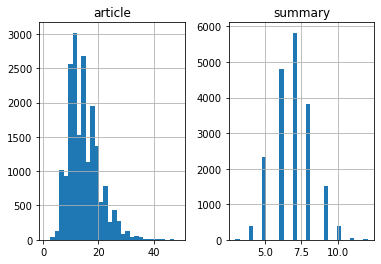

In [124]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in new_df['clean_article'] :
      text_word_count.append(len(i.split()))

for i in new_df['clean_summary'] :
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'article':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [125]:
print("max word in summary : ", max(summary_word_count))
print("max word in article : ", max(text_word_count))

print("min word in summary : ", min(summary_word_count))
print("min word in article : ", min(text_word_count))

max word in summary :  12
max word in article :  49
min word in summary :  3
min word in article :  1


In [126]:
max_len_text=50
max_len_summary=15
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(new_df['clean_article'], new_df['clean_summary'],test_size=0.1,random_state=0) 

In [127]:
word2vec = {}
with open('/content/gdrive/MyDrive/Bangla_News_Article_Dataset/bn_glove.39M.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

In [128]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))
x_word2idx = x_tokenizer.word_index

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) + 1

In [129]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))
y_word2idx = y_tokenizer.word_index

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) + 1

In [130]:
embedding_dim = len(next(iter(word2vec.values())))

In [131]:
# create embedding matrix for x
x_embedding_matrix = np.zeros((x_voc_size, embedding_dim))
for word, i in x_word2idx.items():
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
        x_embedding_matrix[i] = embedding_vector

In [132]:
# create embedding matrix for y
y_embedding_matrix = np.zeros((y_voc_size, embedding_dim))
for word, i in y_word2idx.items():
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
        y_embedding_matrix[i] = embedding_vector

In [133]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [134]:
from keras import backend as K 
K.clear_session() 
latent_dim = 512 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, embedding_dim, weights=[x_embedding_matrix], trainable=False)(encoder_inputs)

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, embedding_dim, weights=[y_embedding_matrix], trainable=False) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 300)      10284600    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 50, 512),    1665024     ['embedding[0][0]']              
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                              

In [135]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [136]:
x_tr
y_tr[:,:-1]
y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

array([[[ 1219],
        [ 1822],
        [  143],
        ...,
        [    0],
        [    0],
        [    0]],

       [[  398],
        [ 1220],
        [  281],
        ...,
        [    0],
        [    0],
        [    0]],

       [[ 5564],
        [ 2807],
        [ 8343],
        ...,
        [    0],
        [    0],
        [    0]],

       ...,

       [[  168],
        [ 2514],
        [  771],
        ...,
        [    0],
        [    0],
        [    0]],

       [[  635],
        [19142],
        [  579],
        ...,
        [    0],
        [    0],
        [    0]],

       [[ 8339],
        [  667],
        [ 1235],
        ...,
        [    0],
        [    0],
        [    0]]], dtype=int32)

In [137]:
y_tr.shape

(17184, 15)

In [138]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], 
                  y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:],
                  epochs=20,
                  callbacks=[early_stopping],
                  batch_size=64, 
                  validation_data=([x_val,y_val[:,:-1]], 
                  y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:])
                 )

Epoch 1/20
269/269 [==============================] - 57s 161ms/step - loss: 3.4239 - accuracy: 0.6175 - val_loss: 2.7653 - val_accuracy: 0.6791
Epoch 2/20
269/269 [==============================] - 42s 156ms/step - loss: 3.1281 - accuracy: 0.6411 - val_loss: 2.6802 - val_accuracy: 0.6820
Epoch 3/20
269/269 [==============================] - 41s 152ms/step - loss: 3.0485 - accuracy: 0.6454 - val_loss: 2.6586 - val_accuracy: 0.6877
Epoch 4/20
269/269 [==============================] - 41s 153ms/step - loss: 2.9582 - accuracy: 0.6507 - val_loss: 2.5780 - val_accuracy: 0.6900
Epoch 5/20
269/269 [==============================] - 42s 155ms/step - loss: 2.8735 - accuracy: 0.6541 - val_loss: 2.5496 - val_accuracy: 0.6887
Epoch 6/20
269/269 [==============================] - 42s 155ms/step - loss: 2.7717 - accuracy: 0.6572 - val_loss: 2.4666 - val_accuracy: 0.6955
Epoch 7/20
269/269 [==============================] - 41s 151ms/step - loss: 2.6753 - accuracy: 0.6607 - val_loss: 2.3810 - val_ac

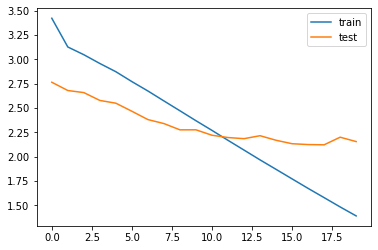

In [139]:
#Visualizing Loss 
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [140]:
#Building Dictionary for Source Vocabulary
reverse_target_word_index = y_tokenizer.index_word 
reverse_source_word_index = x_tokenizer.index_word 
target_word_index = y_tokenizer.word_index

In [141]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [152]:
#Function defining the implementation of inference process
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    # print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print("sampled_token:",sampled_token)
        # print("decoded_sent:",decoded_sentence)
        if(sampled_token!='end' and sampled_token not in decoded_sentence.split() ):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [153]:
#Functions to convert an integer sequence to a word sequence for summary as well as reviews 
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [154]:
#Summaries generated by the model
for i in range(20):
  print("Article:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Article: ‡¶∂‡¶ø ‡¶ú‡¶ø‡¶®‡¶™‡¶ø‡¶Ç‡ßü‡ßá‡¶∞ ‡¶∏‡¶´‡¶∞‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶ï‡ßá ‡¶ã‡¶£ ‡¶∏‡¶π‡¶æ‡ßü‡¶§‡¶æ ‡¶ö‡ßÅ‡¶ï‡ßç‡¶§‡¶ø ‡¶ö‡ßÄ‡¶® ‡¶¨‡¶æ‡¶£‡¶ø‡¶ú‡ßç‡¶Ø‡¶ø‡¶ï ‡¶≠‡¶ø‡¶§‡ßç‡¶§‡¶ø‡¶§‡ßá ‡¶¨‡¶≤‡¶õ‡ßá ‡¶¨‡ßá‡¶á‡¶ú‡¶ø‡¶Ç 
Original summary: ‡¶∏‡ßÅ‡¶¶‡ßá‡¶∞ ‡¶ã‡¶£ ‡¶¨‡¶≤‡¶õ‡ßá ‡¶ö‡ßÄ‡¶® 
1/1 [==============================] - 0s 50ms/step
Predicted summary:  ‡¶ï‡ßã‡¶∞‡¶ø‡ßü‡¶æ‡¶∞ ‡¶∏‡¶´‡¶∞‡ßá ‡ß™‡ß¶ ‡¶¨‡¶ø‡¶≤‡¶ø‡ßü‡¶® ‡¶°‡¶≤‡¶æ‡¶∞‡ßá‡¶∞


Article: ‡¶®‡ßç‡¶Ø‡¶æ‡¶Ø‡ßç‡¶Ø ‡¶Ö‡¶ß‡¶ø‡¶ï‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡¶æ‡¶¨‡¶ø‡¶§‡ßá ‡¶Ü‡¶®‡ßç‡¶¶‡ßã‡¶≤‡¶®‡¶∞‡¶§ ‡¶¨‡¶æ‡¶ô‡¶æ‡¶≤‡¶ø‡¶ï‡ßá ‡¶∏‡ßç‡¶§‡¶¨‡ßç‡¶ß ‡¶Ü‡¶ó‡ßá‡¶∞ ‡¶∞‡¶æ‡¶§‡ßá ‡¶™‡¶æ‡¶ï‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶®‡¶ø ‡¶¨‡¶æ‡¶π‡¶ø‡¶®‡ßÄ ‡¶®‡ßá‡¶Æ‡ßá‡¶õ‡¶ø‡¶≤ ‡¶ó‡¶£‡¶π‡¶§‡ßç‡¶Ø‡¶æ ‡¶¶‡¶ø‡¶¨‡¶∏ ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá ‡¶Ü‡¶®‡ßç‡¶§‡¶∞‡ßç‡¶ú‡¶æ‡¶§‡¶ø‡¶ï‡¶≠‡¶æ‡¶¨‡ßá ‡¶™‡¶æ‡¶≤‡¶®‡ßá‡¶∞ ‡¶¶‡¶æ‡¶¨‡¶ø ‡¶â‡¶†‡ßá‡¶õ‡ßá 
Original summary: ‡¶Ü‡¶®‡ßç‡¶§‡¶∞‡ßç‡¶ú‡¶æ‡¶§‡¶ø‡¶ï ‡¶∏‡ßç‡¶¨‡ßÄ‡¶ï‡ßÉ‡¶§‡¶ø ‡¶¶‡¶æ‡¶¨‡¶ø 
1/1 [==============================] - 0s 41ms/step
Predicted summa

In [155]:
print("Article:",seq2text(x_val[113]))
print("Original summary:",seq2summary(y_val[113]))
print("Predicted summary:",decode_sequence(x_val[113].reshape(1,max_len_text)))

Article: ‡¶§‡¶•‡ßç‡¶Ø ‡¶™‡ßç‡¶∞‡¶Ø‡ßÅ‡¶ï‡ßç‡¶§‡¶ø ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá‡¶∞ ‡¶Ü‡¶á‡¶∏‡¶ø‡¶ü‡¶ø ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞‡ßç‡¶ü‡¶Ü‡¶™ ‡¶ö‡ßç‡¶Ø‡¶æ‡¶≤‡ßá‡¶û‡ßç‡¶ú ‡¶ú‡¶ø‡¶§‡¶≤ ‡¶§‡¶∞‡ßÅ‡¶£‡¶¶‡ßá‡¶∞ ‡¶â‡¶¶‡ßç‡¶≠‡¶æ‡¶¨‡¶®‡ßÄ ‡¶™‡ßç‡¶∞‡¶ï‡¶≤‡ßç‡¶™ 
Original summary: ‡¶∏‡ßç‡¶ü‡¶æ‡¶∞‡ßç‡¶ü‡¶Ü‡¶™ ‡¶ö‡ßç‡¶Ø‡¶æ‡¶≤‡ßá‡¶û‡ßç‡¶ú ‡¶ú‡¶ø‡¶§‡¶≤ ‡ß®‡ß¶ ‡¶â‡¶¶‡ßç‡¶≠‡¶æ‡¶¨‡¶®‡ßÄ ‡¶™‡ßç‡¶∞‡¶ï‡¶≤‡ßç‡¶™ 
1/1 [==============================] - 0s 59ms/step
Predicted summary:  ‡ß®‡ß¶‡ßß‡ß¨ ‡¶∏‡¶æ‡¶≤‡ßá‡¶∞ ‡¶¨‡¶∞‡ßç‡¶∑


In [156]:
#BLEU Score of Training set
#n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
one_gram = []
two_gram = []
for i in range(0,100):
  reference = seq2summary(y_val[i])
  candidate = decode_sequence(x_val[i].reshape(1, max_len_text))
  one_gram.append(sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
  two_gram.append(sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
# reference = seq2summary(y_val[1])
# candidate = decode_sequence(x_val[1].reshape(1, max_len_text))

print(reference)
print(candidate)

1/1 [==============================] - 0s 28ms/step
‡¶¶‡¶∞‡ßç‡¶∂‡¶ï ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö ‡¶ú‡¶ø‡¶§‡ßá ‡¶´‡¶æ‡¶á‡¶®‡¶æ‡¶≤‡ßá ‡¶ò‡¶æ‡¶®‡¶æ 
 ‡¶π‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶¨‡¶≤‡ßá ‡¶π‡¶æ‡¶∞‡¶ø‡ßü‡ßá ‡¶∏‡ßá‡¶Æ‡¶ø‡¶§‡ßá ‡¶¨‡ßç‡¶∞‡¶æ‡¶ú‡¶ø‡¶≤


In [157]:
print("Individual 1-gram: ", np.average(one_gram))

Individual 1-gram:  0.4098850998024298


In [158]:
!pip install rouge
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
# Evaluate summarization using ROUGE metrics
def evaluate_summarization(reference_summary, generated_summary):
    rouge = Rouge()
    scores = rouge.get_scores(generated_summary, reference_summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']

In [160]:
f1_score_1 = []
f1_score_2 = []
f1_score_l = []
for i in range(0,100):
  reference = seq2summary(y_val[i])
  candidate = decode_sequence(x_val[i].reshape(1, max_len_text))
  score_1, score_2, score_l = evaluate_summarization(reference, candidate)
  f1_score_1.append(score_1)
  f1_score_2.append(score_2)
  f1_score_l.append(score_l)


print("ROUGE-1 F1-score:", np.average(f1_score_1))
print("ROUGE-2 F1-score:", np.average(f1_score_2))
print("ROUGE-L F1-score:", np.average(f1_score_l))

1/1 [==============================] - 0s 26ms/step
ROUGE-1 F1-score: 0.11443289883262864
ROUGE-2 F1-score: 0.021238094993156466
ROUGE-L F1-score: 0.11443289883262864
